In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pickle
import scipy.stats
from tqdm import tqdm_notebook
from sklearn.decomposition import IncrementalPCA 

In [3]:
%matplotlib inline
font={'family': 'Times New Roman',
      'size': 10}
plt.rc('font', **font)
matplotlib.rcParams['figure.facecolor'] = (1,1,1,1)

In [4]:
#data_path = '/scratch/gpfs/jabbate/data_60_ms_randomized_flattop/train.pkl'
data_path = '/home/fouriest/SCHOOL/Princeton/PPPL/train.pkl'
with open(data_path,'rb') as f:
    data = pickle.load(f, encoding='latin1')


In [5]:
metric_functions = {'mean': np.mean,
                    'median': np.median,
                    'std': np.std,
                    'variance': np.var,
                    'iqr': lambda x,axis: np.subtract(*np.percentile(x, [75, 25], axis=axis)),
                    'skewness': scipy.stats.skew,
                    'kurtosis': scipy.stats.kurtosis}
actuators = ['pinj','curr','tinj','gasA']


In [6]:
params = {}
for key, value in tqdm_notebook(data.items(), position=0):
    for metric, fn in tqdm_notebook(metric_functions.items(),leave=False, position=1):
        if value.ndim>2:
            params[key + '-' + metric] = fn(value[:,0,:], axis=-1).flatten()
        else:
            params[key + '-' + metric] = fn(value, axis=-1).flatten()

In [60]:
pca_modes = 5
profiles = ['temp','dens','thomson_temp_EFITRT1','thomson_dens_EFITRT1']
for sig in tqdm_notebook(data.keys(), position=0):
    if data[sig].ndim>2:
        U,S,V = np.linalg.svd(data[sig][:,0,:].T, full_matrices=False)
        for i in tqdm_notebook(range(pca_modes), position=0, leave=False):
            params[sig+'-'+'pca'+str(i)] = np.dot(U[:,:pca_modes].T,data[sig][:,0,:].T)[i,:]
    else:
        U,S,V = np.linalg.svd(data[sig].T, full_matrices=False)
        for i in tqdm_notebook(range(pca_modes), position=0, leave=False):
            params[sig+'-'+'pca'+str(i)] = np.dot(U[:,:pca_modes].T,data[sig].T)[i,:]    

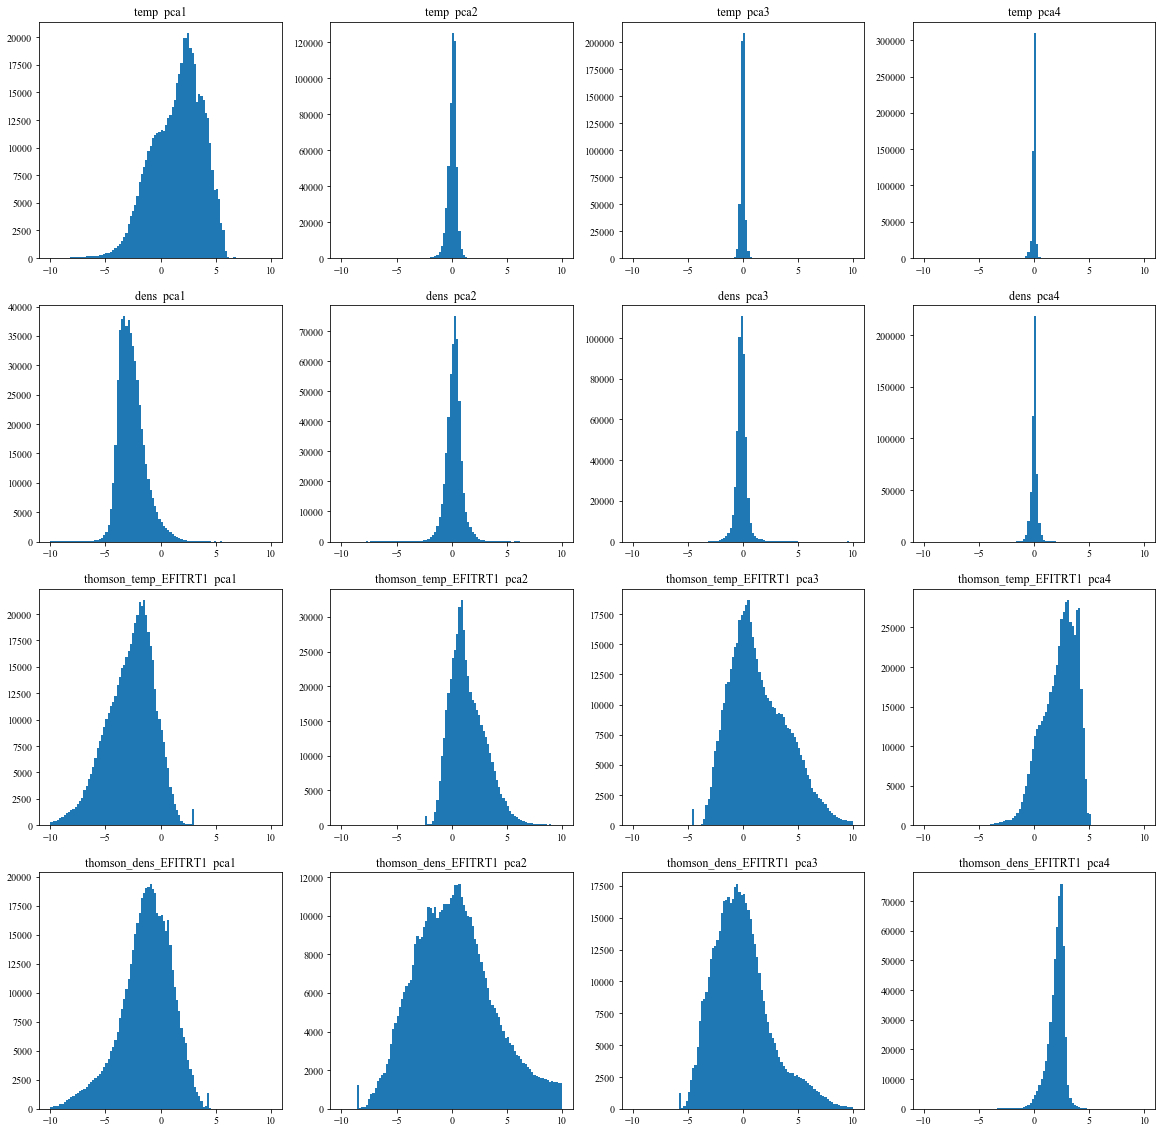

In [32]:
#metrics = ['mean','std','skewness','kurtosis']
metrics = ['pca1', 'pca2', 'pca3', 'pca4']
profiles = ['temp','dens','thomson_temp_EFITRT1','thomson_dens_EFITRT1']

nrows = len(profiles)
ncols = len(metrics)
figsize = (ncols*5,nrows*5)
bins=100
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
for i, sig in tqdm_notebook(enumerate(profiles)):
    for j, metric in tqdm_notebook(enumerate(metrics), leave=False):
        ax[i,j].hist(params[sig + '-' + metric], bins=bins, range=[-10,10])
        ax[i,j].title.set_text(sig + '  ' + metric)



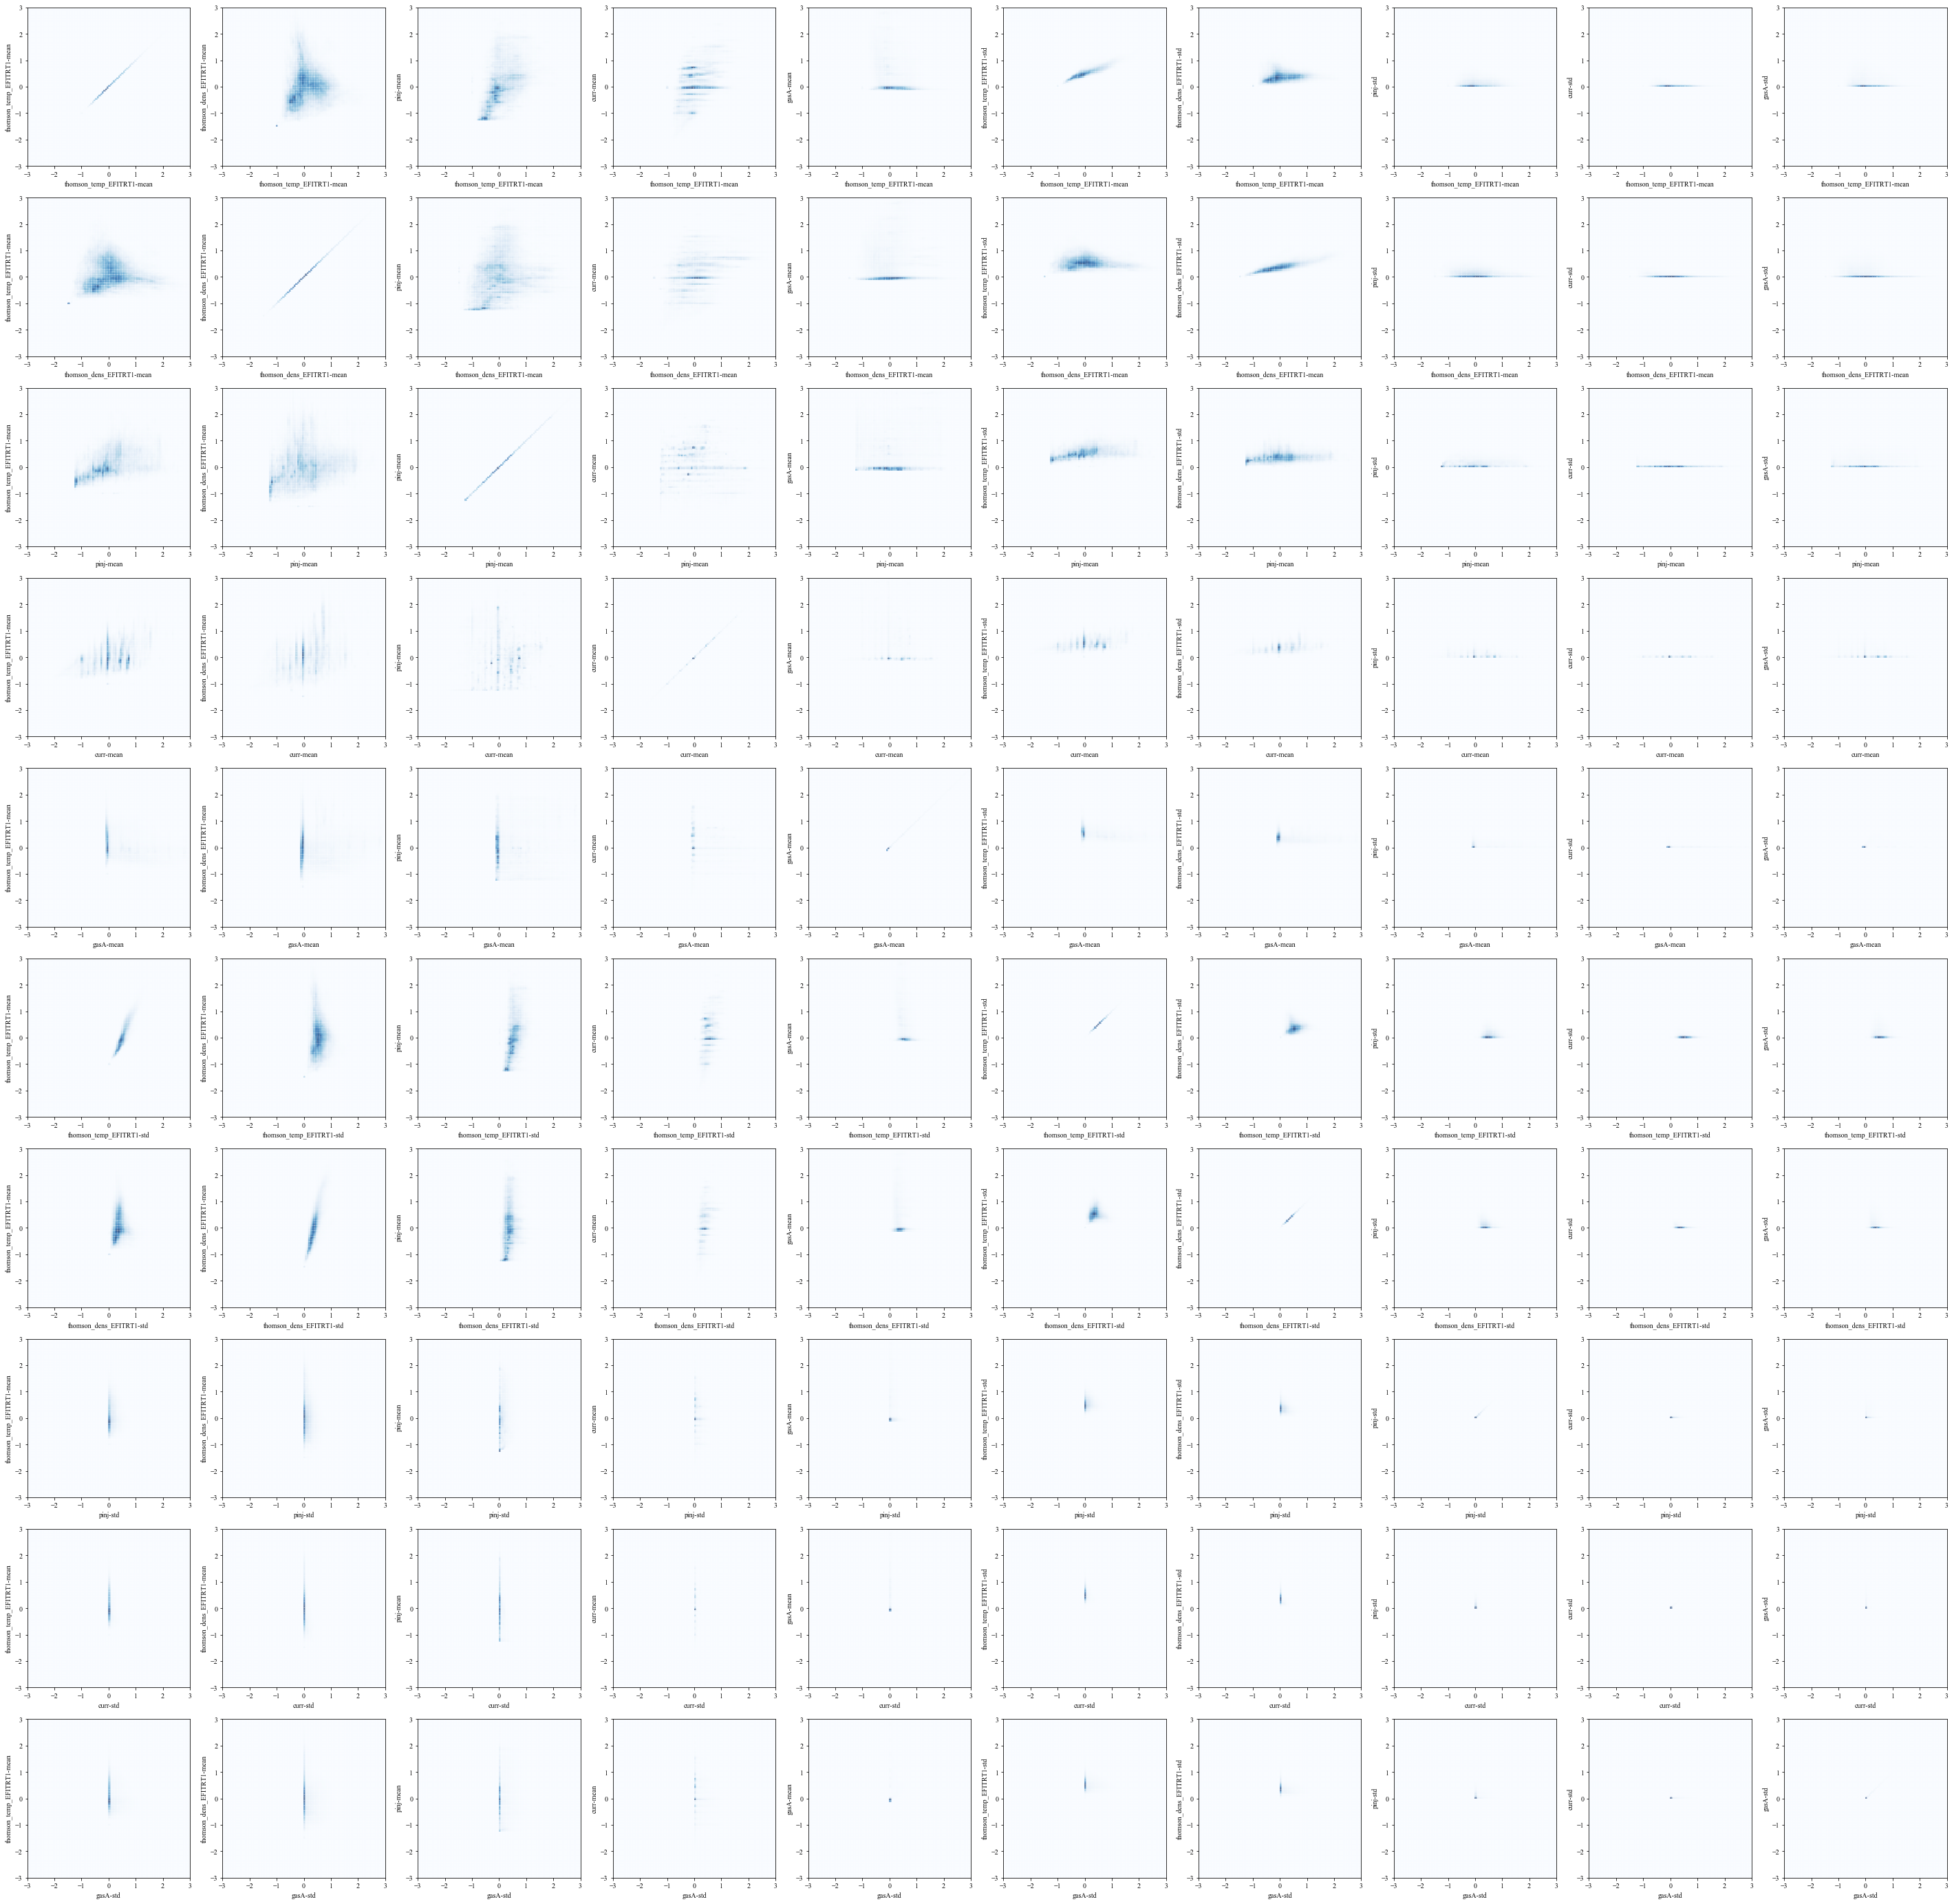

In [71]:
#metrics = ['pca1', 'pca2', 'pca3', 'pca4']
#metrics = ['pca1','pca2']
metrics = ['mean','std']
profiles = ['thomson_temp_EFITRT1','thomson_dens_EFITRT1','pinj','curr','gasA']
labels = [profile + '-' +  metric for metric in metrics for profile in profiles]

nrows = len(labels)
ncols = len(labels)
figsize = (ncols*5,nrows*5)
bins=100
alpha = .5
xrange = [-3,3]
yrange = [-3,3]
cmap = 'Blues'
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
for i, label1 in tqdm_notebook(enumerate(labels), total=len(labels), position=0):
    for j, label2 in tqdm_notebook(enumerate(labels), leave=False, total=len(labels), position=1): 
            ax[i,j].hist2d(params[label1], params[label2], bins=bins, cmap=cmap, alpha=alpha, range = [xrange,yrange])
            ax[i,j].set_xlabel(label1)
            ax[i,j].set_ylabel(label2)
            ax[i,j].set_xlim(xrange)
            ax[i,j].set_ylim(yrange)



In [16]:
shots, counts = np.unique(data['shotnum'][np.nonzero(params['gasA-std']>.4)[0]], return_counts=True)
shots = shots[counts>200]
shots.size

703

In [17]:
print(str(shots))

[156375. 156523. 156790. 156791. 156797. 156855. 156856. 156857. 156858.
 156859. 156860. 156861. 156862. 156863. 156866. 156868. 156869. 156887.
 157198. 157243. 157250. 157980. 157983. 157985. 157998. 158077. 158079.
 158083. 158137. 158144. 158145. 158146. 158147. 158148. 158153. 158154.
 158156. 158158. 158159. 158160. 158161. 158334. 158335. 158336. 158337.
 158353. 158354. 158521. 158522. 158523. 158524. 158525. 158527. 158528.
 158531. 158535. 158538. 158539. 158540. 158541. 158542. 158544. 158545.
 158592. 158593. 158595. 158597. 158598. 158600. 158601. 158602. 158607.
 158609. 158611. 158615. 158616. 158617. 158619. 158620. 158622. 158690.
 158782. 158821. 158822. 158823. 158899. 158902. 158905. 158911. 158912.
 158913. 158914. 158915. 158917. 158918. 158919. 158920. 158925. 158926.
 158929. 158931. 158933. 158935. 158938. 158940. 158941. 158986. 158990.
 159182. 159184. 159275. 159276. 159286. 159289. 159307. 159398. 159441.
 159459. 159535. 159539. 159540. 159544. 159545. 15

In [120]:
np.set_printoptions(threshold=2000)


dict_keys(['curr', 'dens', 'density_estimate', 'gasA', 'gasB', 'gasC', 'gasD', 'gas_feedback', 'pinj', 'target_density', 'temp', 'thomson_dens_EFITRT1', 'thomson_temp_EFITRT1', 'tinj', 'time', 'shotnum'])

In [7]:
np.unique(data['shotnum']).size

10336

In [100]:
params['pinj-std'][np.intersect1d(np.argwhere(data['shotnum']==160288)[:,0], np.argwhere(np.abs(data['time']-2220)<100)[:,0])]

array([0.14550258, 0.19210732, 0.21769211, 0.14550258, 0.14550258,
       0.19210732, 0.14550258, 0.        ])

In [101]:
data['time'][np.intersect1d(np.argwhere(data['shotnum']==160288)[:,0], np.argwhere(np.abs(data['time']-2220)<100)[:,0])]

array([[1760., 1820., 1880., 1940., 2000., 2060., 2120., 2180., 2240.],
       [2180., 2240., 2300., 2360., 2420., 2480., 2540., 2600., 2660.],
       [2240., 2300., 2360., 2420., 2480., 2540., 2600., 2660., 2720.],
       [2000., 2060., 2120., 2180., 2240., 2300., 2360., 2420., 2480.],
       [1880., 1940., 2000., 2060., 2120., 2180., 2240., 2300., 2360.],
       [2060., 2120., 2180., 2240., 2300., 2360., 2420., 2480., 2540.],
       [1940., 2000., 2060., 2120., 2180., 2240., 2300., 2360., 2420.],
       [1700., 1760., 1820., 1880., 1940., 2000., 2060., 2120., 2180.]])

(array([1.60000e+01, 0.00000e+00, 1.60000e+01, 0.00000e+00, 9.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 7.00000e+00, 1.70000e+01, 8.00000e+00, 9.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

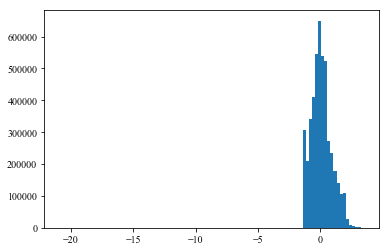

In [66]:
plt.hist(data['pinj'].flatten(), bins=100)